# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

### a) Obtendo a média e a diferença através de uma multiplicação matricial.

In [24]:
df['media']= df[['p1', 'p2']].mean(axis = 1)
df['diferenca']=df['p1']-df['p2']
df.style.format(precision=1, decimal=',')


,p1,p2,media,diferenca,soma
0,"7,0","7,9","7,5","-1,0","14,9"
1,"2,9","5,1","4,0","-2,2","8,0"
2,"2,3","1,0","1,6","1,3","3,2"
3,"5,5","4,5","5,0","1,0","10,0"
4,"7,2","8,9","8,1","-1,7","16,1"
5,"4,2","3,4","3,8","0,8","7,7"
6,"9,8","9,8","9,8","-0,0","19,6"
7,"6,8","7,9","7,4","-1,1","14,8"
8,"4,8","5,7","5,3","-0,9","10,5"
9,"3,9","5,7","4,8","-1,8","9,6"


### b) Cálculo  da correlação entre os dados da p1 e p2

In [26]:
corr = df['p1'].corr(df['p2'])
print(f'Correlação encontrada: {round(corr,4)}')


Correlação encontrada: 0.8957


### b) Cálculo  da correlação entre os dados transformados (média e diferença)

In [5]:
corr = df['media'].corr(df['diferenca'])
print(f'Correlação encontrada: {round(corr,6)}')


Correlação encontrada: -0.133474


In [6]:
df_transf = (df - df.mean()) / df.std()
corr_transf = df_transf.corr()
print(corr_transf)

                 p1        p2     media  diferenca
p1         1.000000  0.895737  0.971960   0.103312
p2         0.895737  1.000000  0.975163  -0.349666
media      0.971960  0.975163  1.000000  -0.133474
diferenca  0.103312 -0.349666 -0.133474   1.000000


### Observações sobre as correlações
A correlação de **0.8957** observada entre as variáveis **p1** e **p2**, por estar próximo a 1 (um), sugere a existência de uma forte relação positiva entre estas variáveis.<br>
Em compensação valores próximos a 0 (zero) indicam ausência de relação linear conforme observado com a correlação negativa de **-0.133474** entre a **média** e a **diferença**.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [29]:
df['soma']=df['p1']+df['p2']
df.head().style.format(precision=1, decimal=',')

,p1,p2,media,diferenca,soma
0,"7,0","7,9","7,5","-1,0","14,9"
1,"2,9","5,1","4,0","-2,2","8,0"
2,"2,3","1,0","1,6","1,3","3,2"
3,"5,5","4,5","5,0","1,0","10,0"
4,"7,2","8,9","8,1","-1,7","16,1"


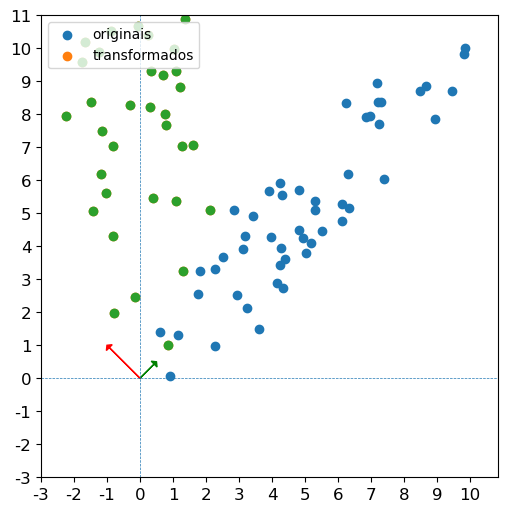

In [35]:
# V I S U A L I Z A Ç Ã O  D A S   T R A N F O R M A Ç Õ E S   D E   D A D O S 
x = df['diferenca']
y = df['soma']

def translin_v2(m):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1,1,1)

    xmin = -3
    xmax = df.p1.max()*1.1
    ymin = -3
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = x, y = y, label = 'transformados')

    ax.legend(loc='upper left')
    
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

plt.scatter(x = x, y = y)